In [124]:

from tensorflow.keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [125]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [126]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [127]:
train_data   #시작은 항상 1로

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [133]:

import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # 문장에 존재하는 단어들만 one-hot encoding
    return results

# 문장들을 일정한 크기의 벡터로 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

X_valid = X_train[:10000]
X_train = X_train[10000:]
y_valid = y_train[:10000]
y_train = y_train[10000:]

In [ ]:
y_train

In [134]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_valid, y_valid),
                    callbacks = callbacks_list)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.4494 - acc: 0.8174 - val_loss: 0.3169 - val_acc: 0.8835
Epoch 2/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.2389 - acc: 0.9174 - val_loss: 0.2760 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1709 - acc: 0.9395 - val_loss: 0.2794 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1306 - acc: 0.9549 - val_loss: 0.3578 - val_acc: 0.8651
Epoch 5/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1007 - acc: 0.9670 - val_loss: 0.3349 - val_acc: 0.8790


In [135]:
loss=history.history['loss'] ; val_loss=history.history['val_loss']

In [ ]:
loss

In [ ]:
import  matplotlib.pyplot as plt

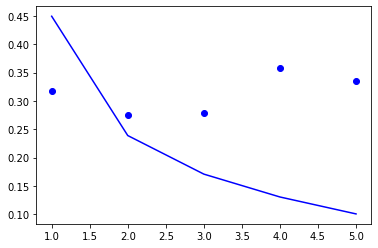

In [136]:
plt.plot(range(1,len(loss)+1),loss,'b',label='train loss')
plt.plot(range(1,len(loss)+1),val_loss,'bo',label='val_loss')
plt.show()

In [112]:
import matplotlib.pyplot as plt

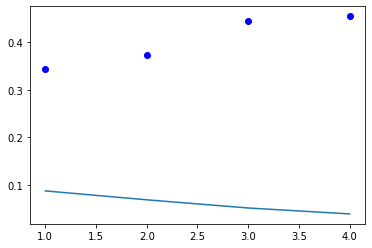

In [131]:
plt.plot(range(1,len(loss)+1),loss)
plt.plot(range(1,len(loss)+1),val_loss,'bo')